##### What is recommendation system?

It is a filtration program whose prime goal is to predict the “rating” or “preference” of a user towards a domain-specific item or item.

##### Types of Recommendations system

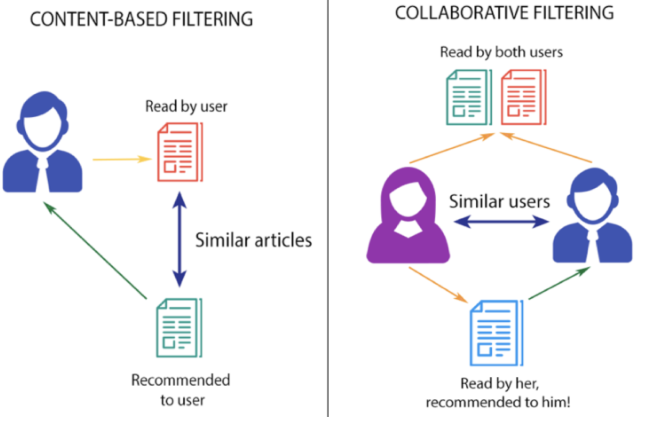

### Content based
This filtration method is based on the data provided about the products. The algorithm recommends products that are similar to the ones that a user has liked in the past.

##### Disadvantages
1. do not get much exposure to user
2. if user does not try different product buisness cannot expand

### Collaborative
This filtration method is based on the combination of the user’s behavior and comparing and contrasting that with other users’ behavior in the database. The history of all users plays an important role in this algorithm.

2 types of collaborative
1. User-based
    Here we find similar past preference patterns
    This is achieved by making matrix of items
    ##### Disadvantages
    1. Taste of peope may change - Fickle-minded
    2. Users >>>> Items - hence difficult to maintain such large matrix
    3. Fake users may make our alogrithm biased
2. Item-based
     find similar movies instead of similar users and then recommending similar movies to that ‘A’ has had in his/her past preferences
     ##### Advantages over User-based
     1. Movie's don't change - like people's taste
     2. easier to maintian matrices of items
     3. movies cannot be fake


### Hybrid
Content + Collaborative

## Project

##### Import Dependencies and dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.head(2)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500

In [4]:
credits.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

##### Merging the datasets based on title

In [5]:
movies = movies.merge(credits, on = 'title')

In [6]:
movies.head(1)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                      homepage     id  \
0  http://www.avatarmovie.com/  19995   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   

  original_title                                           overview  \
0         Avatar  In the 22nd century, a paraplegic Marine is di...   

   popularity                               production_companies  ... runtime  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...   162.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   

                       tagline   title vote_average vote_count movie_id  \
0  Enter the World of Pandora.  Avatar          7.2      11800    19995   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  

[1 rows x 23 columns]

#### Pre-Processing

In [7]:
#Which attributes are important

#Genres
#ID
#Keywords - tags
#Original title
#Overview
#cast
#crew

movies = movies[['movie_id','genres', 'title', 'overview', 'keywords', 'cast', 'crew']]

In [8]:
movies.head()

movie_id                                             genres  \
0     19995  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1       285  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2    206647  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     49026  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     49529  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...   
4  [{"id": 818, "name": "based on novel"}, {"id":...   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [9]:
movies.isnull().sum()

movie_id    0
genres      0
title       0
overview    3
keywords    0
cast        0
crew        0
dtype: int64

In [10]:
movies.dropna(inplace = True)

In [11]:
movies.duplicated().sum()

0

In [12]:
movies.iloc[0].genres 

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [13]:
# list of dictionaries -> format of list
import ast
def convert(obj):
    ls = []
    for i in ast.literal_eval(obj):
        ls.append(i['name'])
    return ls

In [14]:
movies['genres'] = movies['genres'].apply(convert)
movies.head(2)

movie_id                                         genres  \
0     19995  [Action, Adventure, Fantasy, Science Fiction]   
1       285                   [Adventure, Fantasy, Action]   

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

In [15]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head(2)

movie_id                                         genres  \
0     19995  [Action, Adventure, Fantasy, Science Fiction]   
1       285                   [Adventure, Fantasy, Action]   

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   

                                            keywords  \
0  [culture clash, future, space war, space colon...   
1  [ocean, drug abuse, exotic island, east india ...   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

In [16]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [17]:
def convert3(obj):
    ls = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            ls.append(i['name'])
            counter+=1
        else:
            break
    return ls

In [18]:
movies['cast'] = movies['cast'].apply(convert3)
movies.head(2)

movie_id                                         genres  \
0     19995  [Action, Adventure, Fantasy, Science Fiction]   
1       285                   [Adventure, Fantasy, Action]   

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   

                                            keywords  \
0  [culture clash, future, space war, space colon...   
1  [ocean, drug abuse, exotic island, east india ...   

                                               cast  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]   
1     [Johnny Depp, Orlando Bloom, Keira Knightley]   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

In [19]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [20]:
def fetch_director(obj):
    ls = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            ls.append(i['name'])
        else:
            break
    return ls

In [21]:
movies['crew'] = movies['crew'].apply(fetch_director)
movies.head()

movie_id                                         genres  \
0     19995  [Action, Adventure, Fantasy, Science Fiction]   
1       285                   [Adventure, Fantasy, Action]   
2    206647                     [Action, Adventure, Crime]   
3     49026               [Action, Crime, Drama, Thriller]   
4     49529           [Action, Adventure, Science Fiction]   

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                            keywords  \
0  [culture clash, future, space war, space colon...   
1  [ocean, drug abuse, exotic island, east india ...   
2  [spy, based on novel, secret agent, sequel, mi...   
3  [dc comics, crime fighter, terrorist, secret i...   
4  [based on novel, mars, medallion, space travel...   

                                               cast crew  
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]   []  
1     [Johnny Depp, Orlando Bloom, Keira Knightley]   []  
2      [Daniel Craig, Christoph Waltz, Léa Seydoux]   []  
3      [Christian Bale, Michael Caine, Gary Oldman]   []  
4    [Taylor Kitsch, Lynn Collins, Samantha Morton]   []

In [22]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [23]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [24]:
movies.head()

movie_id                                         genres  \
0     19995  [Action, Adventure, Fantasy, Science Fiction]   
1       285                   [Adventure, Fantasy, Action]   
2    206647                     [Action, Adventure, Crime]   
3     49026               [Action, Crime, Drama, Thriller]   
4     49529           [Action, Adventure, Science Fiction]   

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  \
0  [In, the, 22nd, century,, a, paraplegic, Marin...   
1  [Captain, Barbossa,, long, believed, to, be, d...   
2  [A, cryptic, message, from, Bond’s, past, send...   
3  [Following, the, death, of, District, Attorney...   
4  [John, Carter, is, a, war-weary,, former, mili...   

                                            keywords  \
0  [culture clash, future, space war, space colon...   
1  [ocean, drug abuse, exotic island, east india ...   
2  [spy, based on novel, secret agent, sequel, mi...   
3  [dc comics, crime fighter, terrorist, secret i...   
4  [based on novel, mars, medallion, space travel...   

                                               cast crew  
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]   []  
1     [Johnny Depp, Orlando Bloom, Keira Knightley]   []  
2      [Daniel Craig, Christoph Waltz, Léa Seydoux]   []  
3      [Christian Bale, Michael Caine, Gary Oldman]   []  
4    [Taylor Kitsch, Lynn Collins, Samantha Morton]   []

In [25]:
# remove White spaces

movies['genres']   = movies['genres'].apply(lambda x: [i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x: [i.replace(" ","") for i in x])
movies['cast']     = movies['cast'].apply(lambda x: [i.replace(" ","") for i in x])
movies['crew']     = movies['crew'].apply(lambda x: [i.replace(" ","") for i in x])

In [26]:
movies.head()

movie_id                                        genres  \
0     19995  [Action, Adventure, Fantasy, ScienceFiction]   
1       285                  [Adventure, Fantasy, Action]   
2    206647                    [Action, Adventure, Crime]   
3     49026              [Action, Crime, Drama, Thriller]   
4     49529           [Action, Adventure, ScienceFiction]   

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  \
0  [In, the, 22nd, century,, a, paraplegic, Marin...   
1  [Captain, Barbossa,, long, believed, to, be, d...   
2  [A, cryptic, message, from, Bond’s, past, send...   
3  [Following, the, death, of, District, Attorney...   
4  [John, Carter, is, a, war-weary,, former, mili...   

                                            keywords  \
0  [cultureclash, future, spacewar, spacecolony, ...   
1  [ocean, drugabuse, exoticisland, eastindiatrad...   
2  [spy, basedonnovel, secretagent, sequel, mi6, ...   
3  [dccomics, crimefighter, terrorist, secretiden...   
4  [basedonnovel, mars, medallion, spacetravel, p...   

                                            cast crew  
0  [SamWorthington, ZoeSaldana, SigourneyWeaver]   []  
1     [JohnnyDepp, OrlandoBloom, KeiraKnightley]   []  
2      [DanielCraig, ChristophWaltz, LéaSeydoux]   []  
3      [ChristianBale, MichaelCaine, GaryOldman]   []  
4    [TaylorKitsch, LynnCollins, SamanthaMorton]   []

In [27]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
movies.head()

movie_id                                        genres  \
0     19995  [Action, Adventure, Fantasy, ScienceFiction]   
1       285                  [Adventure, Fantasy, Action]   
2    206647                    [Action, Adventure, Crime]   
3     49026              [Action, Crime, Drama, Thriller]   
4     49529           [Action, Adventure, ScienceFiction]   

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  \
0  [In, the, 22nd, century,, a, paraplegic, Marin...   
1  [Captain, Barbossa,, long, believed, to, be, d...   
2  [A, cryptic, message, from, Bond’s, past, send...   
3  [Following, the, death, of, District, Attorney...   
4  [John, Carter, is, a, war-weary,, former, mili...   

                                            keywords  \
0  [cultureclash, future, spacewar, spacecolony, ...   
1  [ocean, drugabuse, exoticisland, eastindiatrad...   
2  [spy, basedonnovel, secretagent, sequel, mi6, ...   
3  [dccomics, crimefighter, terrorist, secretiden...   
4  [basedonnovel, mars, medallion, spacetravel, p...   

                                            cast crew  \
0  [SamWorthington, ZoeSaldana, SigourneyWeaver]   []   
1     [JohnnyDepp, OrlandoBloom, KeiraKnightley]   []   
2      [DanielCraig, ChristophWaltz, LéaSeydoux]   []   
3      [ChristianBale, MichaelCaine, GaryOldman]   []   
4    [TaylorKitsch, LynnCollins, SamanthaMorton]   []   

                                                tags  
0  [In, the, 22nd, century,, a, paraplegic, Marin...  
1  [Captain, Barbossa,, long, believed, to, be, d...  
2  [A, cryptic, message, from, Bond’s, past, send...  
3  [Following, the, death, of, District, Attorney...  
4  [John, Carter, is, a, war-weary,, former, mili...

In [28]:
new_df = movies[['movie_id', 'title', 'tags']]
new_df.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                tags  
0  [In, the, 22nd, century,, a, paraplegic, Marin...  
1  [Captain, Barbossa,, long, believed, to, be, d...  
2  [A, cryptic, message, from, Bond’s, past, send...  
3  [Following, the, death, of, District, Attorney...  
4  [John, Carter, is, a, war-weary,, former, mili...

In [29]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))

C:\Users\saura\AppData\Local\Temp/ipykernel_7364/1824047427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))


In [30]:
new_df.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                tags  
0  In the 22nd century, a paraplegic Marine is di...  
1  Captain Barbossa, long believed to be dead, ha...  
2  A cryptic message from Bond’s past sends him o...  
3  Following the death of District Attorney Harve...  
4  John Carter is a war-weary, former military ca...

In [31]:
new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())
new_df.head()

C:\Users\saura\AppData\Local\Temp/ipykernel_7364/883946691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())


movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                tags  
0  in the 22nd century, a paraplegic marine is di...  
1  captain barbossa, long believed to be dead, ha...  
2  a cryptic message from bond’s past sends him o...  
3  following the death of district attorney harve...  
4  john carter is a war-weary, former military ca...

In [32]:
new_df['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver'

In [33]:
new_df['tags'][1]

"captain barbossa, long believed to be dead, has come back to life and is headed to the edge of the earth with will turner and elizabeth swann. but nothing is quite as it seems. adventure fantasy action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger johnnydepp orlandobloom keiraknightley"

In [34]:
# Using NLP library to make similar words a single word
# like love, loving = love

import nltk # NLP Library
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def stem(text):
    y = []
    
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

In [35]:
new_df['tags'] = new_df['tags'].apply(stem)

C:\Users\saura\AppData\Local\Temp/ipykernel_7364/3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [44]:
# What is similarity between these 2 texts - closest vectors
# Vectorization of words, removing simple words
# sklearn - count vectorization

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words = 'english')

vectors = cv.fit_transform(new_df['tags']).toarray()
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
# cv.get_feature_names()
# actions, action -same word
# 1930s - story of the decade
# love, loving - same

In [47]:
# Distance Calulation
# Vector's distance = cosine similarity = (Q.T*k) / scaling - [0,1]
# In higher dimension Eucledian dostance is not a relaible distance - Curse of Dimensionality

from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors) # 4806 * 4806

In [49]:
similarity[1] # Diagonal always 1

array([0.08585457, 1.        , 0.06253054, ..., 0.02414023, 0.        ,
       0.02654659])

In [59]:
def recommend(movie):
    # Movie Index
    movie_index = new_df[new_df['title'] == movie].index[0]
    
    distances = similarity[movie_index]
    
    # Sorting distance
    # sorted(similarity[0], reverse = True) # bt we need to hold index value too
    movies_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x:x[1])[1:6]
    
    # key - sorting based on 2 no, 1st no is index
    
    for i in movies_list:
        print(new_df.iloc[i[0]].title)

In [62]:
recommend('Batman')

Batman
Batman & Robin
Batman Begins
The R.M.
Batman Returns


In [68]:
import pickle

#to store new_df in a file
# rather than sending dataframe we will send the dictionary
pickle.dump(new_df.to_dict(), open('movies_dict.pkl', 'wb'))

In [69]:
# for similarity matrix 

pickle.dump(similarity, open('similarity.pkl', 'wb'))